# Tree-based methods
### Regression using a decision tree
---
Based on Chapter 8: Tree-based Methods. An Introduction to Statistical Learning: with aplications in R.  Daniela Witten, Gareth James and Trevor Hastie

## Introduction

- The tree-based method consists of a series of **splitting rules**, starting at the top of the tree.

- The general structure of a decision tree <img src="images/tree.png" width=400 height=400 />

[Image source](https://wiki.atlan.com/decision-trees/)


## Dataset
-----


- We will build a regression tree to to predict the baseball player's *Salary* using two variables: 
 - *Years*: the number of years that he has played in the major leagues (in thousands of dollars)
 - *Hits*: the number of hits that he made in the previous year
 
- Dataset can be downloaded from [here](https://www.kaggle.com/floser/hitters).

## Building a tree
---
Using DecisionTreeRegressor()

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("../../../data/dataset-87300.csv")

In [3]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

### We will use only 2 variables: Hits and Years. The target variable is Salary
-----

In [5]:
df = df[["Hits", "Years", "Salary"]].copy()

In [6]:
df

,Hits,Years,Salary
-Andy Allanson,66,1,NaN
-Alan Ashby,81,14,475.0
-Alvin Davis,130,3,480.0
-Andre Dawson,141,11,500.0
-Andres Galarraga,87,2,91.5
...,...,...,...
-Willie McGee,127,5,700.0
-Willie Randolph,136,12,875.0
-Wayne Tolleson,126,6,385.0
-Willie Upshaw,144,8,960.0


In [7]:
# Removing Nan values

In [8]:
df = df.dropna() # realizará la eliminación de filas con al menos 1 valor faltante.

In [9]:
df.describe()

,Hits,Years,Salary
count,263.000000,263.000000,263.000000
mean,107.828897,7.311787,535.925882
std,45.125326,4.793616,451.118681
min,1.000000,1.000000,67.500000
25%,71.500000,4.000000,190.000000
50%,103.000000,6.000000,425.000000
75%,141.500000,10.000000,750.000000
max,238.000000,24.000000,2460.000000


### Building decision tree

- Starting with all of the data, consider a splitting variable $j$ and split point $s$, and define the pair of half-planes

$$
R_1(j,s) = \{X | X_j \leq s\} \, \text{and} \, R_2(j,s) = \{X | X_j > s\}
$$

To perform recursive binary splitting:
- select the predictor $X_j$ and then cutpoint $s$ such that splitting the predictor space  into regions ${X | Xj < s }$ and ${X | Xj \geq s }$  leads to the greatest possible reduction in RSS.
- Consider all the predictors $X_1, X_2, … X_p$ and all the possible values  of the cutpoints $s$ for each of the predictors, then
- Choose the predictor $j$ and cutpoint $s$ such that the resulting tree has the lowest RSS, For any $j$ and $s$, we define the pair of planes:

$$
R_1(j,s) = \{ X \,|\, X_j < s\} \text{ and } R_2 = \{ X \,|\, X_j \geq s\}
$$



In [10]:
X = df[["Years", "Hits"]].values
y = df["Salary"]

In [11]:
X.shape

(263, 2)

## DecisionTreeRegressor()
---
Check here:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [19]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0, max_depth=2,max_leaf_nodes=3) # Revisar los parámetros que puede recibir.
regressor.fit(X,y)

DecisionTreeRegressor(max_depth=2, max_leaf_nodes=3, random_state=0)

In [20]:
mask = df["Years"] <= 4.5 
mask.sum()

90

In [21]:
df["Salary"].mean()

535.9258821292775

In [22]:
df["Salary"][mask].mean()

225.83147777777776

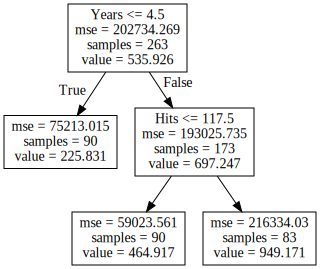

In [23]:
# Gráfica del árbol
from sklearn.tree import export_graphviz

export_graphviz(regressor, out_file="tree.dot", feature_names=["Years", "Hits"])
with open("tree.dot") as f:
    dot_graph= f.read()

import graphviz
display(graphviz.Source(dot_graph))

Set of **splitting rules**:
- $R1 = \{X \,| \, \text{Years <= 4.5}\}$


- $R2 = \{X\, |\, \text{Years > 4.5}, \text{Hits} <= 117.5\}$


- $R3 = \{X\, |\, \text{Years > 4.5}, \text{Hits} > 117.5\}$


### Plotting Tree-regions partitions

In [24]:
years_mean = 4.5
hits_mean = 117.5

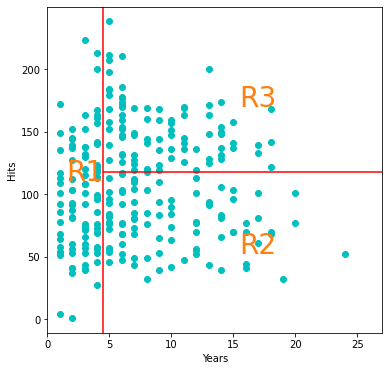

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(df['Years'], df['Hits'], c="c")
plt.axvline(x=years_mean, c="r")
plt.hlines(y=hits_mean, xmin=years_mean, xmax=27, colors="red")
plt.xlabel("Years")
plt.ylabel("Hits")
plt.xlim([0,27])
text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
plt.text(3, hits_mean,"R1", **text_kwargs)
plt.text(17, hits_mean*1.5,"R3", **text_kwargs)
plt.text(17, hits_mean*0.5,"R2", **text_kwargs)
plt.show()

### Saving the model
-----
Check [Model Persistance](https://scikit-learn.org/stable/modules/model_persistence.html)



### Option 1: pickle

In [26]:
import pickle
pickle.dump(regressor, open('gbt_model.pkl', 'wb'))

In [27]:
pickled_model = pickle.load(open('gbt_model.pkl', 'rb'))
pred = pickled_model.predict(X)
print(pred[:20])

[464.91667778 225.83147778 949.17075904 225.83147778 949.17075904
 225.83147778 225.83147778 225.83147778 464.91667778 949.17075904
 464.91667778 225.83147778 464.91667778 464.91667778 949.17075904
 464.91667778 464.91667778 225.83147778 225.83147778 464.91667778]


### Option 2: joblib

In [28]:
from joblib import dump, load
dump(regressor, 'model.joblib')
reg = load('model.joblib')
pred = reg.predict(X)
print(pred[:20])

[464.91667778 225.83147778 949.17075904 225.83147778 949.17075904
 225.83147778 225.83147778 225.83147778 464.91667778 949.17075904
 464.91667778 225.83147778 464.91667778 464.91667778 949.17075904
 464.91667778 464.91667778 225.83147778 225.83147778 464.91667778]
